I tutaj będe sobie pisać eksperymenty i temu podobne sprawy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('refrigerator_temp_time_series.csv')
df.head()

,czas(min),alpha,temp,Ts
0,0,1,"6,50",2
1,15,0,"6,35","2,18"
2,30,0,"6,20","2,19"
3,45,1,"6,05","1,68"
4,60,1,"5,90","1,5"


In [3]:
df['temp'] = df['temp'].apply(lambda x: x.replace(',','.')).astype('float64')
df['Ts'] = df['Ts'].apply(lambda x: x.replace(',','.')).astype('float64')

In [4]:
df.head()

,czas(min),alpha,temp,Ts
0,0,1,6.50,2.00
1,15,0,6.35,2.18
2,30,0,6.20,2.19
3,45,1,6.05,1.68
4,60,1,5.90,1.50


In [5]:
df.rename(columns={"czas(min)": "time", "alpha": "compressor", "temp": 'ambient_temp', "Ts": 'refrigerator_temp'}, inplace=True)
df.set_index('time', inplace=True)
df.head()

,compressor,ambient_temp,refrigerator_temp
time,,,
0,1,6.50,2.00
15,0,6.35,2.18
30,0,6.20,2.19
45,1,6.05,1.68
60,1,5.90,1.50


In [6]:
size = 1000
delay = 100

a = df.iloc[0:size,:].to_numpy().reshape(delay,size*3//delay)
a

array([[ 1.  ,  6.5 ,  2.  , ...,  0.  ,  5.26,  1.82],
       [ 0.  ,  5.23,  1.86, ...,  0.  ,  5.39,  1.48],
       [ 0.  ,  5.3 ,  1.53, ...,  1.  ,  5.99,  0.9 ],
       ...,
       [ 0.  ,  1.97, -1.98, ...,  0.  ,  1.23, -1.93],
       [ 0.  ,  1.2 , -1.92, ...,  0.  ,  2.01, -2.07],
       [ 1.  ,  2.13, -2.17, ...,  1.  ,  4.01, -2.48]])

In [7]:


delay = 4
frames = [df.shift(-t) for t in range(delay)]
# small_df = df.iloc[:40]
delayed_df = pd.concat(frames, axis=1).dropna()

small_df = delayed_df.iloc[:50]
small_df.shape


(50, 12)

In [8]:
forest = Forest(delayed_df)
 

NameError: name 'Forest' is not defined

In [9]:
out_of_bag  = small_df
print(out_of_bag.shape)
data_size_for_tree = 5
for i in range(10):
    training_data = small_df.sample(data_size_for_tree, replace=True)
    out_of_bag = out_of_bag[~out_of_bag.index.isin(training_data.index)]
# out_of_bag[~out_of_bag.isin(training_data)].dropna()
# out_of_bag.isin(training_data.merge(training_data))
# print(out_of_bag.size)
print(out_of_bag.shape)
training_data.head()

(50, 12)
(19, 12)


,compressor,ambient_temp,refrigerator_temp,compressor,ambient_temp,refrigerator_temp,compressor,ambient_temp,refrigerator_temp,compressor,ambient_temp,refrigerator_temp
time,,,,,,,,,,,,
45,1,6.05,1.68,1.0,5.90,1.50,0.0,5.74,1.64,0.0,5.59,1.62
510,1,6.81,0.64,1.0,7.06,0.60,0.0,7.30,0.79,0.0,7.29,0.81
255,0,5.60,1.22,0.0,5.49,1.22,0.0,5.39,1.48,0.0,5.30,1.53
90,0,5.59,1.62,0.0,5.44,1.56,0.0,5.30,1.54,0.0,5.26,1.82
735,0,7.99,0.59,0.0,7.97,0.84,0.0,7.94,0.93,0.0,7.90,0.98


In [10]:
out_of_bag.values


array([[1.  , 5.9 , 1.5 , 0.  , 5.74, 1.64, 0.  , 5.59, 1.62, 0.  , 5.44,
        1.56],
       [0.  , 5.26, 1.82, 0.  , 5.23, 1.86, 0.  , 5.21, 1.89, 1.  , 5.2 ,
        1.2 ],
       [0.  , 5.23, 1.86, 0.  , 5.21, 1.89, 1.  , 5.2 , 1.2 , 1.  , 5.32,
        1.2 ],
       [0.  , 5.21, 1.89, 1.  , 5.2 , 1.2 , 1.  , 5.32, 1.2 , 0.  , 5.44,
        1.36],
       [1.  , 5.32, 1.2 , 0.  , 5.44, 1.36, 1.  , 5.57, 1.24, 1.  , 5.7 ,
        1.07],
       [0.  , 5.3 , 1.53, 1.  , 5.39, 1.12, 0.  , 5.49, 1.26, 0.  , 5.59,
        1.47],
       [0.  , 5.74, 1.54, 0.  , 5.79, 1.57, 1.  , 5.84, 1.15, 1.  , 5.9 ,
        1.  ],
       [0.  , 5.79, 1.57, 1.  , 5.84, 1.15, 1.  , 5.9 , 1.  , 1.  , 5.99,
        0.9 ],
       [1.  , 5.84, 1.15, 1.  , 5.9 , 1.  , 1.  , 5.99, 0.9 , 1.  , 6.09,
        0.84],
       [1.  , 5.9 , 1.  , 1.  , 5.99, 0.9 , 1.  , 6.09, 0.84, 1.  , 6.19,
        0.79],
       [1.  , 6.09, 0.84, 1.  , 6.19, 0.79, 1.  , 6.3 , 0.73, 1.  , 6.55,
        0.69],
       [1.  , 6.19, 0

In [11]:
print(forest.out_of_bag.shape)
test = forest.out_of_bag.iloc[0].values
print(test)
print(forest.predict(test[:-1]))
# df.shape

NameError: name 'forest' is not defined

forest.trees[0]

In [12]:
df["ambient_refrigerator_diff"] = df["ambient_temp"] - df["refrigerator_temp"]
df_diff = df.diff().rename(columns={"refrigerator_temp": "refrigerator_temp_diff", "ambient_temp": "ambient_temp_diff"}).loc[:, ["refrigerator_temp_diff","ambient_temp_diff"]]
frames = [df, df_diff]
df = pd.concat(frames, axis=1).dropna()
df.describe()

,compressor,ambient_temp,refrigerator_temp,ambient_refrigerator_diff,refrigerator_temp_diff,ambient_temp_diff
count,2975.000000,2975.000000,2975.000000,2975.000000,2975.000000,2975.000000
mean,0.522017,6.155815,-0.841603,6.997418,0.000188,0.001449
std,0.499599,3.734449,1.336080,2.983292,0.128239,0.232284
min,0.000000,-2.000000,-3.150000,-0.210000,-0.690000,-1.440000
25%,0.000000,3.600000,-1.940000,5.080000,-0.050000,-0.110000
50%,1.000000,5.430000,-1.060000,6.500000,0.000000,-0.010000
75%,1.000000,8.270000,0.155000,8.650000,0.050000,0.120000
max,1.000000,20.300000,3.910000,17.710000,0.520000,1.570000


In [13]:
delay = 3
frames = [df.shift(-t) for t in range(delay)]
# small_df = df.iloc[:40]
delayed_df = pd.concat(frames, axis=1).dropna()
delayed_df.head()

,compressor,ambient_temp,refrigerator_temp,ambient_refrigerator_diff,refrigerator_temp_diff,ambient_temp_diff,compressor,ambient_temp,refrigerator_temp,ambient_refrigerator_diff,refrigerator_temp_diff,ambient_temp_diff,compressor,ambient_temp,refrigerator_temp,ambient_refrigerator_diff,refrigerator_temp_diff,ambient_temp_diff
time,,,,,,,,,,,,,,,,,,
15,0,6.35,2.18,4.17,0.18,-0.15,0.0,6.20,2.19,4.01,0.01,-0.15,1.0,6.05,1.68,4.37,-0.51,-0.15
30,0,6.20,2.19,4.01,0.01,-0.15,1.0,6.05,1.68,4.37,-0.51,-0.15,1.0,5.90,1.50,4.40,-0.18,-0.15
45,1,6.05,1.68,4.37,-0.51,-0.15,1.0,5.90,1.50,4.40,-0.18,-0.15,0.0,5.74,1.64,4.10,0.14,-0.16
60,1,5.90,1.50,4.40,-0.18,-0.15,0.0,5.74,1.64,4.10,0.14,-0.16,0.0,5.59,1.62,3.97,-0.02,-0.15
75,0,5.74,1.64,4.10,0.14,-0.16,0.0,5.59,1.62,3.97,-0.02,-0.15,0.0,5.44,1.56,3.88,-0.06,-0.15


In [14]:
to_be_predicted = delayed_df.iloc[:,-2].shift(-1)
to_be_predicted.head()

time
15   -0.18
30    0.14
45   -0.02
60   -0.06
75   -0.02
Name: refrigerator_temp_diff, dtype: float64

In [15]:
actual_refrigerator_temp = delayed_df.iloc[:,-4].shift(-1)
actual_refrigerator_temp.head()

time
15    1.50
30    1.64
45    1.62
60    1.56
75    1.54
Name: refrigerator_temp, dtype: float64

In [16]:
final_df = pd.concat([delayed_df, to_be_predicted, actual_refrigerator_temp], axis=1).dropna()
final_df.head()

,compressor,ambient_temp,refrigerator_temp,ambient_refrigerator_diff,refrigerator_temp_diff,ambient_temp_diff,compressor,ambient_temp,refrigerator_temp,ambient_refrigerator_diff,refrigerator_temp_diff,ambient_temp_diff,compressor,ambient_temp,refrigerator_temp,ambient_refrigerator_diff,refrigerator_temp_diff,ambient_temp_diff,refrigerator_temp_diff,refrigerator_temp
time,,,,,,,,,,,,,,,,,,,,
15,0,6.35,2.18,4.17,0.18,-0.15,0.0,6.20,2.19,4.01,0.01,-0.15,1.0,6.05,1.68,4.37,-0.51,-0.15,-0.18,1.50
30,0,6.20,2.19,4.01,0.01,-0.15,1.0,6.05,1.68,4.37,-0.51,-0.15,1.0,5.90,1.50,4.40,-0.18,-0.15,0.14,1.64
45,1,6.05,1.68,4.37,-0.51,-0.15,1.0,5.90,1.50,4.40,-0.18,-0.15,0.0,5.74,1.64,4.10,0.14,-0.16,-0.02,1.62
60,1,5.90,1.50,4.40,-0.18,-0.15,0.0,5.74,1.64,4.10,0.14,-0.16,0.0,5.59,1.62,3.97,-0.02,-0.15,-0.06,1.56
75,0,5.74,1.64,4.10,0.14,-0.16,0.0,5.59,1.62,3.97,-0.02,-0.15,0.0,5.44,1.56,3.88,-0.06,-0.15,-0.02,1.54


In [17]:

training_data = final_df.iloc[:-100, :-1]
test_data = final_df.iloc[-100:, :]
training_data.shape

(2872, 19)

In [18]:
import random_forest
from random_forest.forest import Forest

random_forest.tree.config.create_config(min_split_size=30, number_of_predictors_to_draw=15)
random_forest.forest.config.create_config(data_size_for_tree=200, number_of_trees=100)

forest = Forest(training_data)

In [19]:
test_data.iloc[:, -6]
forest.out_of_bag.shape

(1, 19)

In [20]:
prediction_err_sum = 0
actual_value = 0
naive_err_sum = 0
for test in test_data.values:
    previous_temp = test[-6]
    actual_value = test[-1]
    prediction_err_sum += abs(((forest.predict(test[:-2]) + previous_temp) - actual_value))
    naive_err_sum += abs((previous_temp - actual_value))

# out_of_bag_size = forest.out_of_bag.shape[0]
print(f"test mean error {(prediction_err_sum/test_data.shape[0])}%")
print(f"Naive mean error {(naive_err_sum/test_data.shape[0])}%")

test mean error 0.12449812426648155%
Naive mean error 0.11790000000000006%


In [21]:
test_data.shape

(100, 20)

In [22]:
print(f"previous = {test[-6]} forest prediction = {forest.predict(test[:-2])+test[-6]} current = {test[-1]}")

previous = 2.72 forest prediction = 2.6119051894151397 current = 2.56


In [23]:
forest.trees[0]


        min_split_size: 30
        number_of_predictors_to_draw: 15
        
        Node:
            if <= 17_-1.4400000000000004:
                Leaf: -0.55
            else:
                
        Node:
            if <= 13_15.03:
                
        Node:
            if <= 5_-0.3800000000000008:
                Leaf: 0.1425
            else:
                
        Node:
            if <= 16_0.31000000000000005:
                
        Node:
            if <= 4_0.19999999999999973:
                
        Node:
            if <= 10_0.040000000000000036:
                
        Node:
            if <= 7_4.98:
                
        Node:
            if <= 11_0.08000000000000007:
                
        Node:
            if <= 14_-0.48:
                
        Node:
            if <= 7_3.55:
                Leaf: -0.04461538461538454
            else:
                Leaf: -0.08583333333333336  
        
            else:
                Leaf: 0.01833333333333334  


In [24]:
test[21]

IndexError: index 21 is out of bounds for axis 0 with size 20

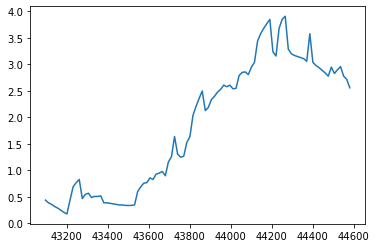

In [25]:
import matplotlib. pyplot as plt
plt.plot(test_data.iloc[:,-1])